## CLUSTERING AS A PRE-PROCESSING STEP (k=20)-

#### Since the models directly done on the Kaggle dataset didn't perform well, we will do another clustering for the hotels and check the models on the newly clustered data.
***
### 1. Load the cleaned original train dataset-

In [1]:
import pandas as pd 
import numpy as np 

path_train_final ='F:/AML/Project/clean dataset/FinalExpedia_set_cleaned/Train_set_cleaned.csv'

train_set=pd.read_csv(path_train_final)

In [4]:
train_set.shape

(2512931, 39)

### 2. Clustering-
#### Check for Optimal k with elbow method-

C:\Users\User-\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\User-\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\User-\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\User-\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of

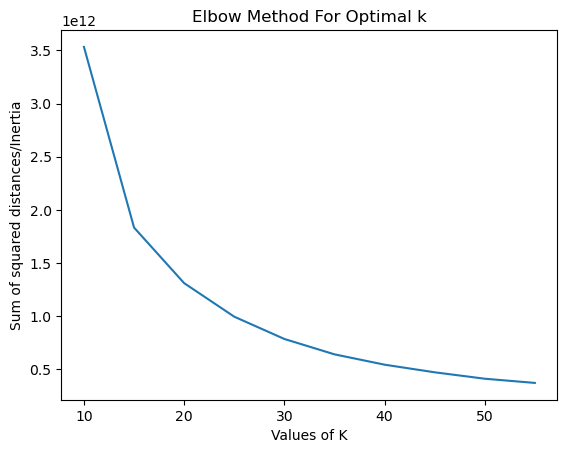

In [5]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

Sum_of_squared_distances = []
K = range(10,60,5)
for num_clusters in K :
 kmeans = KMeans(n_clusters=num_clusters)
 kmeans.fit(train_set[['srch_destination_id', 'srch_destination_type_id', 'cnt',
       'hotel_continent', 'hotel_country', 'hotel_market']])
 Sum_of_squared_distances.append(kmeans.inertia_)
plt.plot(K,Sum_of_squared_distances)
plt.xlabel('Values of K') 
plt.ylabel('Sum of squared distances/Inertia') 
plt.title('Elbow Method For Optimal k')
plt.show()

#### KMeans algorithm is used for creating the optimum no.of clusters. We use the features related to only destination hotel to cluster dataset.

In [6]:
from sklearn.cluster import KMeans

Kmean = KMeans(n_clusters=20).fit(train_set[['srch_destination_id', 'srch_destination_type_id', 'cnt',
       'hotel_continent', 'hotel_country', 'hotel_market']])

new_clusters=Kmean.labels_
train_set["new_hotel_cluster"]=new_clusters #update train_set with new hotel clusters
train_set["new_hotel_cluster"].value_counts() #new cluster distribution

C:\Users\User-\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


16    532823
4     490748
0     366160
3     155142
1     133998
10    107520
19    106836
17     77372
6      77143
12     67532
18     57587
13     57229
15     53587
9      45693
5      42240
11     41519
8      29297
2      26002
14     24193
7      20310
Name: new_hotel_cluster, dtype: int64

#### Split this train set to train and test datasets in 80:20 ratio.

In [7]:
predictors = [c for c in train_set.columns if c not in ["new_hotel_cluster"]]

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(train_set[predictors], train_set["new_hotel_cluster"], test_size=0.2)

### 3. Using models-
#### Apply the classification models on this clustered data.

#### RANDOM FOREST-
***
##### a. with 50 binary trees-

In [9]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_validate

clf = RandomForestClassifier(n_estimators=50, min_weight_fraction_leaf=0.1)
clf.fit(X_train,y_train)
preds = clf.predict(X_test)

In [58]:
from sklearn.metrics import f1_score,accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

print("Accuracy:", accuracy_score(y_test, preds))
print("Precision:",precision_score(y_test, preds, average="micro"))
print("Recall:",recall_score(y_test, preds,  average="micro"))
print("F1 Score:",f1_score(y_test, preds,  average="micro"))

Accuracy: 0.4836760838515371
Precision: 0.4836760838515371
Recall: 0.4836760838515371
F1 Score: 0.4836760838515371


##### b. with 100 binary trees-

In [10]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_validate

clf = RandomForestClassifier(n_estimators=100, min_weight_fraction_leaf=0.1)
clf.fit(X_train,y_train)
preds = clf.predict(X_test)

In [11]:
from sklearn.metrics import f1_score,accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

print("Accuracy:", accuracy_score(y_test, preds))
print("Precision:",precision_score(y_test, preds, average="micro"))
print("Recall:",recall_score(y_test, preds,  average="micro"))
print("F1 Score:",f1_score(y_test, preds,  average="micro"))

Accuracy: 0.5360902689484607
Precision: 0.5360902689484607
Recall: 0.5360902689484607
F1 Score: 0.5360902689484607


#### KERAS-
***
##### Load the required libraries-

In [12]:
!pip install tensorflow

In [13]:
!pip install scikeras
import tensorflow as tf
import keras
from scikeras.wrappers import KerasClassifier
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout

from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.model_selection import KFold,train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.pipeline import Pipeline

import os
import gc
import zipfile
import io

import pickle
import time
from datetime import date

import matplotlib.pyplot as plt
import seaborn as sns

##### Consider the initial train_set-

In [21]:
train_set['new_hotel_cluster'].replace([0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19],  
                               ['zero','One','Two','Three','Four','Five','Six','Seven','Eight','Nine','Ten','Eleven','Twelve','Thirteen','Fourteen','Fifteen','Sixteen','Seventeen','Eighteen','Nineteen'], 
                               inplace=True)
train_set['new_hotel_cluster'].value_counts()

Sixteen      532823
Four         490748
zero         366160
Three        155142
One          133998
Ten          107520
Nineteen     106836
Seventeen     77372
Six           77143
Twelve        67532
Eighteen      57587
Thirteen      57229
Fifteen       53587
Nine          45693
Five          42240
Eleven        41519
Eight         29297
Two           26002
Fourteen      24193
Seven         20310
Name: new_hotel_cluster, dtype: int64

In [22]:
X_train_k = train_set.drop(['new_hotel_cluster'], axis=1)
y_train_k = train_set['new_hotel_cluster']

In [23]:
from sklearn.preprocessing import LabelEncoder

# encode class values as integers
encoder = LabelEncoder()
encoder.fit(y_train_k)
encoded_y = encoder.transform(y_train_k)
# convert integers to dummy variables (i.e. one hot encoded)
y = keras.utils.to_categorical(encoded_y)

In [24]:
X_traink, X_testk, y_traink, y_testk = train_test_split(X_train_k, y, test_size=0.2, random_state=1)

In [25]:
# scales data between 0 and 1
X_traink = keras.utils.normalize(X_traink, axis=1)  
X_testk = keras.utils.normalize(X_testk, axis=1)

##### The Keras model-

In [26]:
def c_model():

  model = Sequential()
  model.add(Dense(2048, activation='relu', input_dim=39))
  # model.add(Dense(1024, activation='relu'))
  # model.add(Dropout(0.25))
  model.add(Dense(512, activation='relu'))
  # model.add(Dropout(0.25))
  model.add(Dense(256, activation='relu'))
  # model.add(Dropout(0.25))
  # model.add(Dense(128, activation='relu'))
  # model.add(Dropout(0.25))
  model.add(Dense(64, activation='relu'))
  # model.add(Dropout(0.5))
  model.add(Dense(20, activation='softmax'))
  
  model.compile(optimizer='adam',
                loss='categorical_crossentropy',
                metrics=['accuracy'])
  
  return model

##### a. For epochs=15, batch_size=20000

In [27]:
model = KerasClassifier(build_fn=c_model, epochs=15, batch_size=20000)
model.fit(X_traink, y_traink)

C:\Users\User-\anaconda3\Lib\site-packages\scikeras\wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)




Epoch 1/15


101/101 [==============================] - 101s 962ms/step - loss: 2.2644 - accuracy: 0.2558
Epoch 2/15
101/101 [==============================] - 99s 979ms/step - loss: 1.3031 - accuracy: 0.5092
Epoch 3/15
101/101 [==============================] - 100s 990ms/step - loss: 1.0071 - accuracy: 0.5884
Epoch 4/15
101/101 [==============================] - 100s 993ms/step - loss: 0.9076 - accuracy: 0.6368
Epoch 5/15
101/101 [==============================] - 99s 975ms/step - loss: 0.7152 - accuracy: 0.7293
Epoch 6/15
101/101 [==============================] - 105s 1s/step - loss: 0.6235 - accuracy: 0.7499
Epoch 7/15
101/101 [==============================] - 91s 905ms/step - loss: 0.8522 - accuracy: 0.6860
Epoch 8/15
101/101 [==============================] - 87s 863ms/step - loss: 0.5225 - accuracy: 0.8234
Epoch 9/15
101/101 [==============================] - 91s 900ms/step - loss: 0.5128 - accuracy: 0.8002
Epoch 10/15
101/101 [==============================] - 87s 864ms/ste

KerasClassifier(
	model=None
	build_fn=<function c_model at 0x000001EF5CA03600>
	warm_start=False
	random_state=None
	optimizer=rmsprop
	loss=None
	metrics=None
	batch_size=20000
	validation_batch_size=None
	verbose=1
	callbacks=None
	validation_split=0.0
	shuffle=True
	run_eagerly=False
	epochs=15
	class_weight=None
)

In [28]:
pred=model.predict(X_testk)

26/26 [==============================] - 7s 267ms/step


In [29]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.metrics import f1_score


print("F1 Score:", f1_score(pred,y_testk, average="micro"))
print("Accuracy:", accuracy_score(pred,y_testk))
print("Precision:",precision_score(pred,y_testk, average="micro"))
print("Recall:",recall_score(pred,y_testk,  average="micro"))


F1 Score: 0.7667926150099384
Accuracy: 0.7667926150099386
Precision: 0.7667926150099386
Recall: 0.7667926150099386


##### b. For epochs=20, batch_size=15000

In [30]:
model = KerasClassifier(build_fn=c_model, epochs=20, batch_size=15000)
model.fit(X_traink, y_traink)

C:\Users\User-\anaconda3\Lib\site-packages\scikeras\wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


Epoch 1/20
135/135 [==============================] - 104s 752ms/step - loss: 2.0454 - accuracy: 0.3176
Epoch 2/20
135/135 [==============================] - 100s 741ms/step - loss: 1.0653 - accuracy: 0.5715
Epoch 3/20
135/135 [==============================] - 96s 710ms/step - loss: 0.8448 - accuracy: 0.6540
Epoch 4/20
135/135 [==============================] - 89s 660ms/step - loss: 0.6601 - accuracy: 0.7375
Epoch 5/20
135/135 [==============================] - 92s 682ms/step - loss: 0.6584 - accuracy: 0.7490
Epoch 6/20
135/135 [==============================] - 97s 717ms/step - loss: 0.5171 - accuracy: 0.8052
Epoch 7/20
135/135 [==============================] - 98s 729ms/step - loss: 0.7085 - accuracy: 0.7365
Epoch 8/20
135/135 [==============================] - 93s 692ms/step - loss: 0.4215 - accuracy: 0.8701
Epoch 9/20
135/135 [==============================] - 89s 663ms/step - loss: 0.4394 - accuracy: 0.8200
Epoch 10/20
135/135 [==============================] - 90s 669ms/step -

KerasClassifier(
	model=None
	build_fn=<function c_model at 0x000001EF5CA03600>
	warm_start=False
	random_state=None
	optimizer=rmsprop
	loss=None
	metrics=None
	batch_size=15000
	validation_batch_size=None
	verbose=1
	callbacks=None
	validation_split=0.0
	shuffle=True
	run_eagerly=False
	epochs=20
	class_weight=None
)

In [31]:
pred=model.predict(X_testk)

34/34 [==============================] - 12s 318ms/step


In [32]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.metrics import f1_score


print("F1 Score:", f1_score(pred,y_testk, average="micro"))
print("Accuracy:", accuracy_score(pred,y_testk))
print("Precision:",precision_score(pred,y_testk, average="micro"))
print("Recall:",recall_score(pred,y_testk,  average="micro"))


F1 Score: 0.7963337690787864
Accuracy: 0.7963337690787864
Precision: 0.7963337690787864
Recall: 0.7963337690787864


##### Better accuracy can be achieved, but that would require reducing the batch size which would take longer run times and might run into memory issues.